### Fake_News_Warmup

yimin_wang

### Load Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

In [3]:
df_real = pd.read_csv("BuzzFeed_real_news_content.csv")
df_fake = pd.read_csv("BuzzFeed_fake_news_content.csv")

### Glimpse the Data

In [4]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              91 non-null     object
 1   title           91 non-null     object
 2   text            91 non-null     object
 3   url             91 non-null     object
 4   top_img         91 non-null     object
 5   authors         84 non-null     object
 6   source          91 non-null     object
 7   publish_date    56 non-null     object
 8   movies          4 non-null      object
 9   images          91 non-null     object
 10  canonical_link  90 non-null     object
 11  meta_data       91 non-null     object
dtypes: object(12)
memory usage: 8.7+ KB


In [5]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              91 non-null     object
 1   title           91 non-null     object
 2   text            91 non-null     object
 3   url             83 non-null     object
 4   top_img         81 non-null     object
 5   authors         57 non-null     object
 6   source          83 non-null     object
 7   publish_date    77 non-null     object
 8   movies          21 non-null     object
 9   images          81 non-null     object
 10  canonical_link  80 non-null     object
 11  meta_data       91 non-null     object
dtypes: object(12)
memory usage: 8.7+ KB


In [6]:
df_real.head(3)

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Real_1-Webpage,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com/36942/another-terrorist...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Leonora Cravotta",http://eaglerising.com,{'$date': 1474528230000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36942/another-terrorist...,"{""description"": ""\u201cWe believe at this poin..."
1,Real_10-Webpage,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws/2d4lNn9,http://a.abcnews.com/images/Politics/AP_donald...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/donald-trump-dr...,"{""fb_title"": ""Trump: Drugs a 'Very, Very Big F..."
2,Real_11-Webpage,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com/barack-obama/obama-un...,http://rightwingnews.com/wp-content/uploads/20...,Cassy Fiano,http://rightwingnews.com,{'$date': 1474476044000},https://www.youtube.com/embed/ji6pl5Vwrvk,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/barack-obama/obama-un...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam..."


In [7]:
df_fake.head(3)

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Fake_1-Webpage,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,http://www.addictinginfo.org/2016/09/19/proof-...,http://addictinginfo.addictinginfoent.netdna-c...,Wendy Gittleson,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,http://addictin...",http://addictinginfo.com/2016/09/19/proof-the-...,"{""publisher"": ""Addicting Info | The Knowledge ..."
1,Fake_10-Webpage,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,http://eaglerising.com/36899/charity-clinton-f...,http://eaglerising.com/wp-content/uploads/2016...,View All Posts,http://eaglerising.com,{'$date': 1474416521000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36899/charity-clinton-f...,"{""description"": ""The possibility that CHAI dis..."
2,Fake_11-Webpage,A Hillary Clinton Administration May be Entire...,After collapsing just before trying to step in...,http://eaglerising.com/36880/a-hillary-clinton...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Tony Elliott",http://eaglerising.com,{'$date': 1474416638000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36880/a-hillary-clinton...,"{""description"": ""Hillary Clinton may be the fi..."


### Clean Data

In [20]:
print(list(df_real.columns))
print(list(df_fake.columns))

['id', 'title', 'text', 'url', 'top_img', 'authors', 'source', 'publish_date', 'movies', 'images', 'canonical_link', 'meta_data']
['id', 'title', 'text', 'url', 'top_img', 'authors', 'source', 'publish_date', 'movies', 'images', 'canonical_link', 'meta_data']


#### Add label "real" for real news and label "fake" for fake news

In [23]:
df_fake['label'] = 'fake'
df_real['label'] = 'real'

In [24]:
df = pd.concat([df_real, df_fake], ignore_index=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              182 non-null    object
 1   title           182 non-null    object
 2   text            182 non-null    object
 3   url             174 non-null    object
 4   top_img         172 non-null    object
 5   authors         141 non-null    object
 6   source          174 non-null    object
 7   publish_date    133 non-null    object
 8   movies          25 non-null     object
 9   images          172 non-null    object
 10  canonical_link  170 non-null    object
 11  meta_data       182 non-null    object
 12  label           182 non-null    object
dtypes: object(13)
memory usage: 18.6+ KB


#### Add a new column "with_images" to categorize observations with images as True, observation without images as False 

In [32]:
df['with_images'] = df.images.apply(lambda x: False if pd.isnull(x) else True)

### EDA

In [34]:
df.head(3)

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data,label,with_images
0,Real_1-Webpage,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com/36942/another-terrorist...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Leonora Cravotta",http://eaglerising.com,{'$date': 1474528230000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36942/another-terrorist...,"{""description"": ""\u201cWe believe at this poin...",real,True
1,Real_10-Webpage,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws/2d4lNn9,http://a.abcnews.com/images/Politics/AP_donald...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/donald-trump-dr...,"{""fb_title"": ""Trump: Drugs a 'Very, Very Big F...",real,True
2,Real_11-Webpage,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com/barack-obama/obama-un...,http://rightwingnews.com/wp-content/uploads/20...,Cassy Fiano,http://rightwingnews.com,{'$date': 1474476044000},https://www.youtube.com/embed/ji6pl5Vwrvk,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/barack-obama/obama-un...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam...",real,True


#### Check distribution of fake news and real news

##### 1. distribution of fake news and real news

<AxesSubplot:xlabel='label', ylabel='count'>

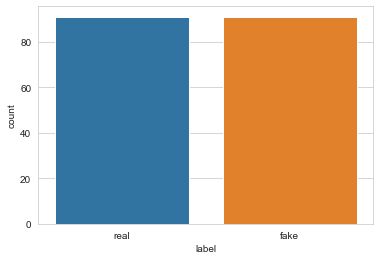

In [35]:
sns.set_style('whitegrid')
sns.countplot(df['label'])

##### 2. Which sources publish maximum fake news?

In [38]:
df_fake['source'].value_counts().head(n=10)

http://rightwingnews.com              17
http://freedomdaily.com               16
http://eaglerising.com                11
http://occupydemocrats.com             6
http://www.thepoliticalinsider.com     3
http://www.addictinginfo.org           3
https://goo.gl                         3
http://usherald.com                    2
https://ihavethetruth.com              2
http://clashdaily.com                  2
Name: source, dtype: int64

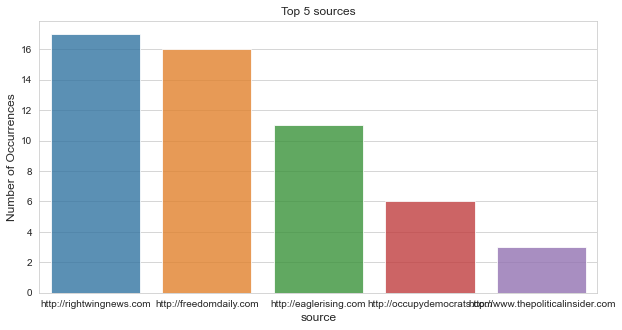

In [37]:
# Visualize the top 5 sources that publish fake news
source_count  = df_fake['source'].value_counts()
source_count = source_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(source_count.index, source_count.values, alpha=0.8)
plt.title('Top 5 sources')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('source', fontsize=12)
plt.show()

##### 3. A close look at news titles